In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [13]:
# df = pd.read_csv("../results/data.csv")
# index_new_exps = 4294
# df = df.iloc[index_new_exps:]

# df_newcol = df.set_axis(
#     [
#         "dataset",
#         "foundational_model",
#         "adapter",
#         "n_features",
#         "n_components",
#         "is_fine_tuned",
#         "pca_in_preprocessing",
#         "use_revin",
#         "context_length",
#         "forecasting_horizon",
#         "running_time",
#         "seed",
#         "metric",
#         "value",
#         "train_size",
#     ],
#     axis=1,
# )
# print(len(df_newcol))
# df_newcol.head()

In [14]:
df = pd.read_csv("../results/data_latest.csv")
df["adapter"] = df["adapter"].fillna("no_adapter")
df.head()

,dataset,foundational_model,adapter,n_features,n_components,is_fine_tuned,pca_in_preprocessing,use_revin,context_length,forecasting_horizon,running_time,seed,metric,value,train_size
0,Illness,AutonLab/MOMENT-1-small,linearAE,7,7,ft_then_supervised,False,True,512.0,24,1023.801718,832.0,mse,2.665083,141.0
1,Illness,AutonLab/MOMENT-1-small,linearAE,7,7,ft_then_supervised,False,True,512.0,24,1023.801718,832.0,mae,1.134758,141.0
2,Illness,AutonLab/MOMENT-1-small,linearAE,7,7,ft_then_supervised,False,True,512.0,24,1023.801718,832.0,scaled_mse,2.657057,141.0
3,Illness,AutonLab/MOMENT-1-small,linearAE,7,7,ft_then_supervised,False,True,512.0,24,1023.801718,832.0,scaled_mae,1.142708,141.0
4,Illness,AutonLab/MOMENT-1-small,linearAE,7,7,ft_then_supervised,False,True,512.0,24,601.990601,22708.0,mse,2.686855,141.0


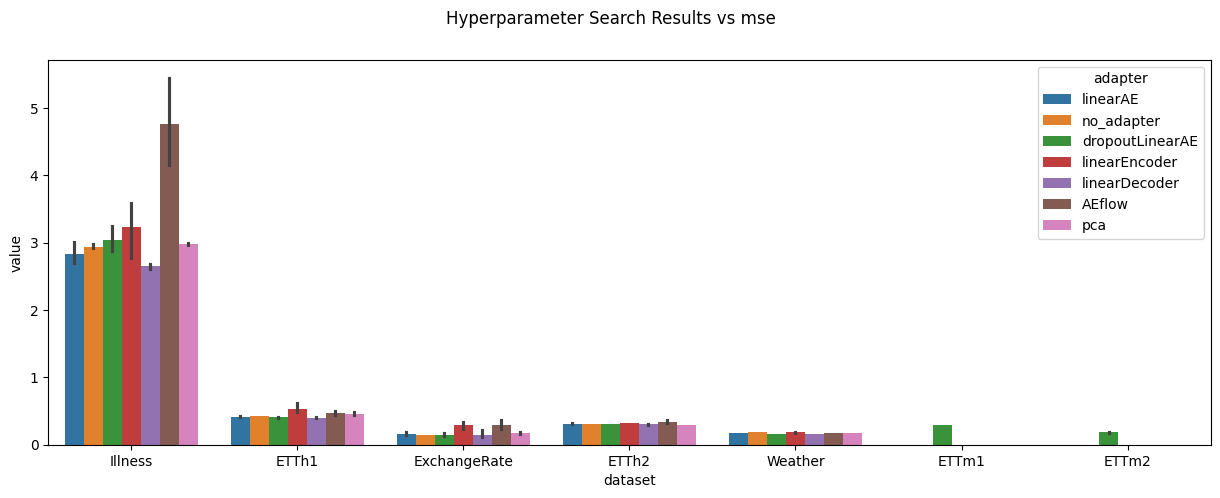

In [15]:
metric = "mse"

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
# axes = axes.flatten()
fig.suptitle(f"Hyperparameter Search Results vs {metric}")

sns.barplot(
    df.loc[df["metric"] == metric], x="dataset", y="value", hue="adapter", ax=axes
)
plt.show()

In [16]:
def print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    metric,
    train_size=None,
    is_fine_tuned="supervised",
):
    if train_size:
        df_ = df.loc[
            (df["dataset"] == dataset)
            & (df["adapter"] == adapter)
            & (df["n_components"] == n_components)
            & (df["use_revin"] == use_revin)
            & (df["pca_in_preprocessing"] == pca_in_preprocessing)
            & (df["metric"] == metric)
            & (df["forecasting_horizon"] == forecasting_horizon)
            & (df["train_size"] == train_size)
            & (df["is_fine_tuned"] == is_fine_tuned)
        ]
    else:
        df_ = df.loc[
            (df["dataset"] == dataset)
            & (df["adapter"] == adapter)
            & (df["n_components"] == n_components)
            & (df["use_revin"] == use_revin)
            & (df["pca_in_preprocessing"] == pca_in_preprocessing)
            & (df["metric"] == metric)
            & (df["forecasting_horizon"] == forecasting_horizon)
            & (df["is_fine_tuned"] == is_fine_tuned)
        ]
    print(
        f"Dataset: {dataset}, Adapter: {adapter}, n_components: {n_components}, use_revin: {use_revin}, pca_in_preprocessing: {pca_in_preprocessing}"
    )
    print(
        f"Mean: {df_['value'].mean()}, Std: {df_['value'].std()}, Standard Error: {df_['value'].sem()}"
    )
    print(f"Min: {df_['value'].min()}, Max: {df_['value'].max()}")
    print(
        f"25th percentile: {df_['value'].quantile(0.25)}, 75th percentile: {df_['value'].quantile(0.75)}"
    )
    print(f"Median: {df_['value'].median()}")
    print("Count of seeds: ", len(df_))
    print("\n")

In [37]:
dataset = "Weather"
adapter = "no_adapter"
n_components = 21
use_revin = False
pca_in_preprocessing = False
forecasting_horizon = 96
train_size = None
is_fine_tuned = "ft"

print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    "mse",
    train_size,
    is_fine_tuned,
)
print("---")
print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    "mae",
    train_size,
    is_fine_tuned,
)
print("---")
print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    "ks",
    train_size,
    is_fine_tuned,
)
print("---")
print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    "ece",
    train_size,
    is_fine_tuned,
)

Dataset: Weather, Adapter: no_adapter, n_components: 21, use_revin: False, pca_in_preprocessing: False
Mean: 0.18718749542250807, Std: 0.00034365785432800133, Standard Error: 0.00024300279920334844
Min: 0.1869444926233047, Max: 0.1874304982217114
25th percentile: 0.18706599402290638, 75th percentile: 0.18730899682210972
Median: 0.18718749542250807
Count of seeds:  2


---
Dataset: Weather, Adapter: no_adapter, n_components: 21, use_revin: False, pca_in_preprocessing: False
Mean: 0.24217842789871954, Std: 0.0006664258167651999, Standard Error: 0.00047123421419245637
Min: 0.2417071936845271, Max: 0.242649662112912
25th percentile: 0.24194281079162333, 75th percentile: 0.24241404500581576
Median: 0.24217842789871954
Count of seeds:  2


---
Dataset: Weather, Adapter: no_adapter, n_components: 21, use_revin: False, pca_in_preprocessing: False
Mean: nan, Std: nan, Standard Error: nan
Min: nan, Max: nan
25th percentile: nan, 75th percentile: nan
Median: nan
Count of seeds:  0


---
Dataset: 

In [36]:
adapter = "dropoutLinearAE"
use_revin = True
pca_in_preprocessing = False
train_size = None
is_fine_tuned = "ft_then_supervised"

print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    "mse",
    train_size,
    is_fine_tuned,
)
print("---")
print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    "mae",
    train_size,
    is_fine_tuned,
)
print("---")
print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    "ks",
    train_size,
    is_fine_tuned,
)
print("---")
print_scores(
    dataset,
    adapter,
    forecasting_horizon,
    n_components,
    use_revin,
    pca_in_preprocessing,
    "ece",
    train_size,
    is_fine_tuned,
)

Dataset: Weather, Adapter: dropoutLinearAE, n_components: 21, use_revin: True, pca_in_preprocessing: False
Mean: 0.15587027323325495, Std: 0.001185155204134739, Standard Error: 0.0006842496761386775
Min: 0.1545130100095191, Max: 0.1567004642856348
25th percentile: 0.155455177707065, 75th percentile: 0.15654890484512285
Median: 0.1563973454046109
Count of seeds:  3


---
Dataset: Weather, Adapter: dropoutLinearAE, n_components: 21, use_revin: True, pca_in_preprocessing: False
Mean: 0.21206251734866244, Std: 0.001410807760127226, Standard Error: 0.000814530240084267
Min: 0.2105036769488765, Max: 0.2132516825815108
25th percentile: 0.21146793473223824, 75th percentile: 0.2128419375485554
Median: 0.2124321925156
Count of seeds:  3


---
Dataset: Weather, Adapter: dropoutLinearAE, n_components: 21, use_revin: True, pca_in_preprocessing: False
Mean: nan, Std: nan, Standard Error: nan
Min: nan, Max: nan
25th percentile: nan, 75th percentile: nan
Median: nan
Count of seeds:  0


---
Dataset: W

### Barplot different Linear adapters

/tmp/ipykernel_3240084/2777996122.py:33: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  bar = sns.barplot(


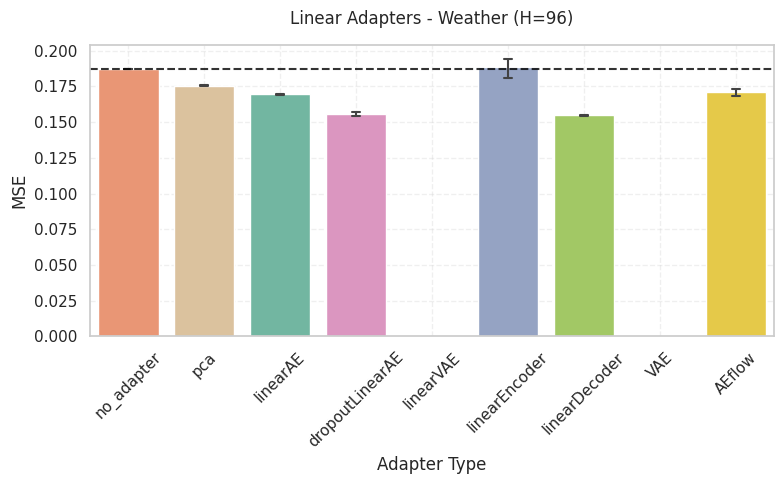

In [20]:
dataset = "Weather"
n_components = 21
use_revin = True
pca_in_preprocessing = False
metric = "mse"
forecasting_horizon = 96

df_ = df.loc[
    (df["dataset"] == dataset)
    & (df["n_components"] == n_components)
    # & (df["use_revin"] == use_revin)
    & (df["pca_in_preprocessing"] == pca_in_preprocessing)
    & (df["metric"] == metric)
    & (df["forecasting_horizon"] == forecasting_horizon)
    & (df["is_fine_tuned"].isin(["ft_then_supervised", "ft"]))
]

baseline = df.loc[
    (df["dataset"] == dataset)
    & (df["n_components"] == n_components)
    & (df["adapter"] == "no_adapter")
    & (df["pca_in_preprocessing"] == pca_in_preprocessing)
    & (df["metric"] == metric)
    & (df["forecasting_horizon"] == forecasting_horizon)
    & (df["is_fine_tuned"].isin(["ft_then_supervised", "ft"]))
]
mean_baseline = baseline["value"].mean()

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Create barplot
bar = sns.barplot(
    data=df_,
    x="adapter",
    y="value",
    hue="adapter",
    order=[
        "no_adapter",
        "pca",
        "linearAE",
        "dropoutLinearAE",
        "linearVAE",
        "linearEncoder",
        "linearDecoder",
        "VAE",
        "AEflow",
    ],
    capsize=0.1,
    errwidth=1.5,
    palette="Set2",
)
# Add horizontal line for baseline
plt.axhline(
    y=mean_baseline, color="black", linestyle="--", alpha=0.8, label="baseline mean"
)

# Customize plot
plt.title(f"Linear Adapters - {dataset} (H={forecasting_horizon})", pad=15)
plt.xlabel("Adapter Type", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("MSE", fontsize=12)
# plt.legend(
#     title="Supervised Training", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=3
# )

# Add grid and adjust layout
plt.grid(True, alpha=0.3, linestyle="--")
plt.tight_layout()

# # Save figure
plt.savefig(
    f"/mnt/vdb/abenechehab/dicl-adapters/figures/from_notebooks/result_{dataset}.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

## RevIn ablation

/tmp/ipykernel_3240084/3657985267.py:22: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  bar = sns.barplot(


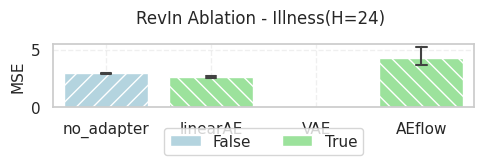

In [21]:
dataset = "Illness"
# adapter = "revin"
n_components = 7
# use_revin = False
pca_in_preprocessing = False
metric = "mse"
forecasting_horizon = 24

adapters_to_keep = ["no_adapter", "linearAE", "VAE", "AEflow"]

df_ = df.loc[
    (df["dataset"] == dataset)
    & (df["n_components"] == n_components)
    & (df["pca_in_preprocessing"] == pca_in_preprocessing)
    & (df["metric"] == metric)
    & (df["forecasting_horizon"] == forecasting_horizon)
    & (df["adapter"].isin(adapters_to_keep))
]

plt.figure(figsize=(5, 2))
sns.set(style="whitegrid", color_codes=True)
bar = sns.barplot(
    df_,
    x="adapter",
    y="value",
    hue="use_revin",
    order=adapters_to_keep,
    palette=sns.color_palette(["lightblue", "lightgreen"]),
    capsize=0.1,
    errwidth=1.5,
)

hatches = ["//", "\\\\"]
# Loop over the bars
for bars, hatch in zip(bar.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)

# Add hatching pattern to the second hue category
# bars = plt.gca().patches
# n_bars = len(df_["adapter"].unique())
# for i in range(n_bars, len(bars)):
#     bars[i].set_hatch("///")
plt.title(f"RevIn Ablation - {dataset}(H={forecasting_horizon}) ", fontsize=12, pad=15)
plt.xlabel(None)
plt.ylabel("MSE", fontsize=11)
# plt.xticks(rotation=45)
plt.legend(title_fontsize=10, bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=3)
plt.grid(True, alpha=0.3, linestyle="--")
plt.savefig(
    "/mnt/vdb/abenechehab/dicl-adapters/figures/from_notebooks/revin_illness.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.tight_layout()

## Dimensionality reduction

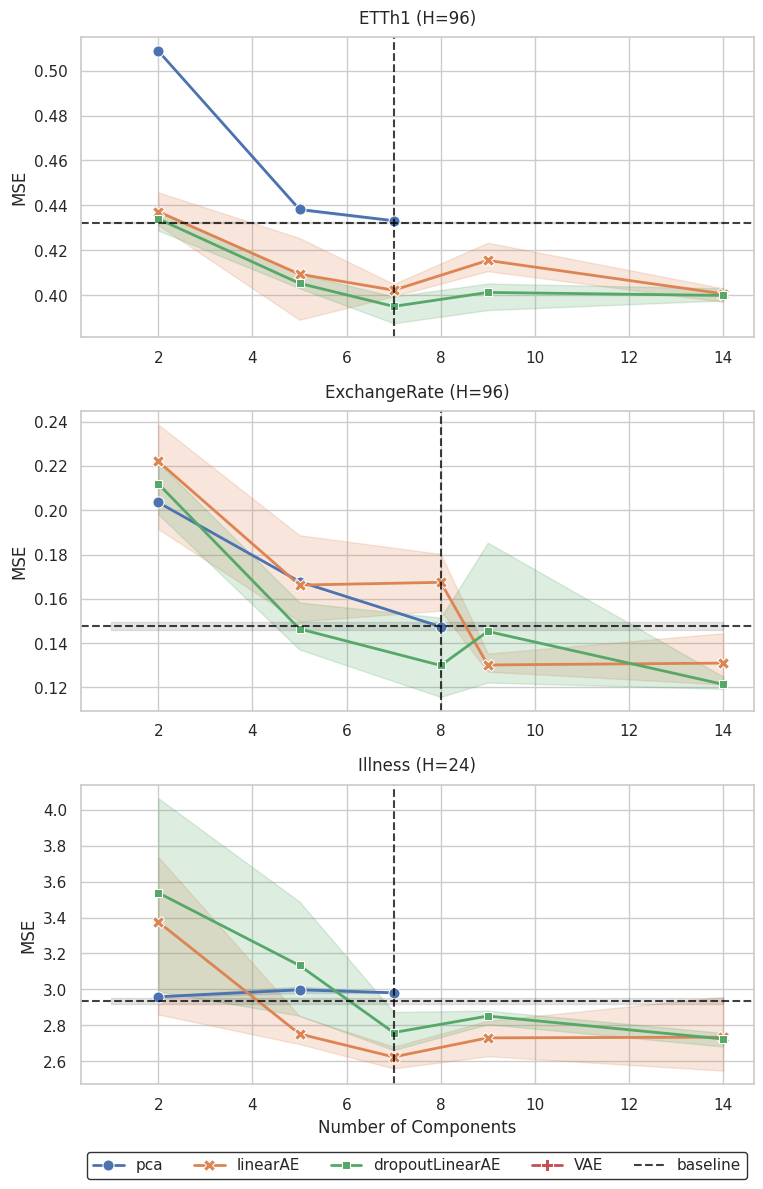

In [22]:
dataset_configs = [
    {"dataset": "ETTh1", "forecasting_horizon": 96, "n_components": 7},
    {"dataset": "ExchangeRate", "forecasting_horizon": 96, "n_components": 8},
    {"dataset": "Illness", "forecasting_horizon": 24, "n_components": 7},
]

plt.figure(figsize=(8, 12))

for i, config in enumerate(dataset_configs):
    # Filter data for current dataset
    df_plot = df.loc[
        (df["dataset"] == config["dataset"])
        & (df["pca_in_preprocessing"] == pca_in_preprocessing)
        & (df["metric"] == metric)
        & (df["forecasting_horizon"] == config["forecasting_horizon"])
        & (
            (
                df["adapter"].isin(["linearAE", "dropoutLinearAE", "VAE"])
                & (df["use_revin"] == True)
            )
            | (df["adapter"] == "pca")
        )
        & (df["is_fine_tuned"].isin(["ft_then_supervised", "ft"]))
    ]

    # Get baseline for current dataset
    baseline_df = df.loc[
        (df["dataset"] == config["dataset"])
        & (df["pca_in_preprocessing"] == pca_in_preprocessing)
        & (df["metric"] == metric)
        & (df["forecasting_horizon"] == config["forecasting_horizon"])
        & (df["adapter"] == "no_adapter")
        & (df["n_components"] == config["n_components"])
        & (df["use_revin"] == False)
        & (df["is_fine_tuned"].isin(["ft_then_supervised", "ft"]))
    ]
    baseline = baseline_df["value"].mean()
    baseline_std = baseline_df["value"].std()

    # Create subplot
    plt.subplot(3, 1, i + 1)

    # Plot lines
    # Define the order of adapters for consistent legend
    adapter_order = ["pca", "linearAE", "dropoutLinearAE", "VAE"]

    # Create line plot with specified order
    sns.lineplot(
        data=df_plot,
        x="n_components",
        y="value",
        hue="adapter",
        style="adapter",
        hue_order=adapter_order,
        style_order=adapter_order,
        markers=True,
        dashes=False,
        marker="o",
        markersize=8,
        linewidth=2,
    )

    # Add baseline
    plt.axvline(
        x=config["n_components"],
        color="black",
        linestyle="--",
        alpha=0.75,
        label="baseline",
    )
    plt.axhline(y=baseline, color="black", linestyle="--", alpha=0.75)
    plt.fill_between(
        np.arange(1, 15),
        [baseline - baseline_std / np.sqrt(len(baseline_df))],
        [baseline + baseline_std / np.sqrt(len(baseline_df))],
        color="black",
        alpha=0.1,
    )

    # Customize plot
    plt.title(f"{config['dataset']} (H={config['forecasting_horizon']})", pad=10)
    plt.xlabel("Number of Components" if i == 2 else "")
    plt.ylabel("MSE")

    if i < 2:  # Only show legend for last subplot
        plt.legend([], [], frameon=False)

plt.legend(
    # title="Method",
    title_fontsize=12,
    bbox_to_anchor=(0.5, -0.2),
    loc="upper center",
    ncol=5,
    frameon=True,
    edgecolor="black",
)

plt.tight_layout()
plt.savefig(
    "/mnt/vdb/abenechehab/dicl-adapters/figures/from_notebooks/n_comp_comparison.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

## Latent representation

In [18]:
from dicl.utils.main_script import prepare_data
from sklearn.decomposition import PCA

Illness_pred=24, size: (141, 7, 512), val size (74, 7, 512), test size (170, 7, 512)


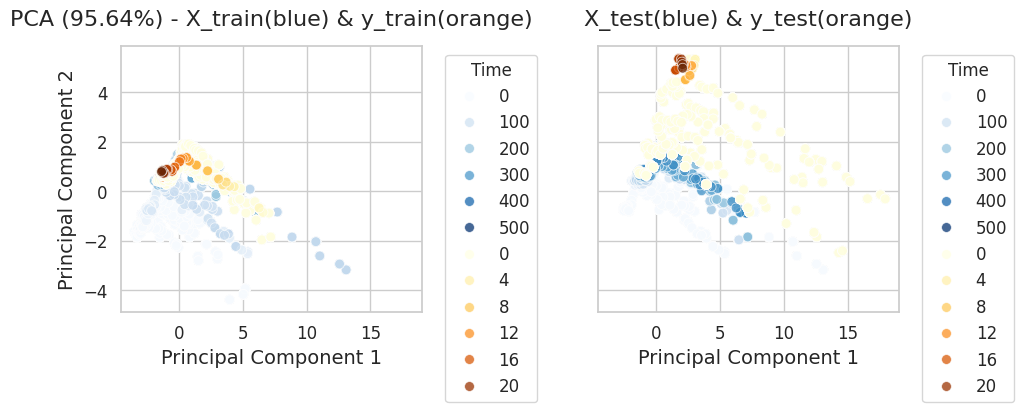

In [34]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="Illness_pred=24", context_length=512, forecasting_horizon=24
)
print(
    f"Illness_pred=24, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

X_train = (
    np.concatenate([X_train, X_val], axis=0).swapaxes(1, 2).reshape(-1, n_features)
)
y_train = (
    np.concatenate([y_train, y_val], axis=0).swapaxes(1, 2).reshape(-1, n_features)
)

X_test = X_test.swapaxes(1, 2).reshape(-1, n_features)
y_test = y_test.swapaxes(1, 2).reshape(-1, n_features)

# Apply PCA to X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

y_pca = pca.transform(y_train)
X_test_pca = pca.transform(X_test)
y_test_pca = pca.transform(y_test)
# Compute the amount of explained variance by PCA
explained_variance = pca.explained_variance_ratio_

# Prepare data for plotting
max_time = X_train.shape[0] + y_train.shape[0]
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca_df["batch_idx"] = X_pca_df.index // 512
X_pca_df["time"] = X_pca_df.index % 512


y_pca_df = pd.DataFrame(y_pca, columns=["PC1", "PC2"])
y_pca_df["batch_idx"] = y_pca_df.index // 24
y_pca_df["time"] = y_pca_df.index % 24

X_test_pca_df = pd.DataFrame(X_test_pca, columns=["PC1", "PC2"])
X_test_pca_df["batch_idx"] = X_test_pca_df.index // 512
X_test_pca_df["time"] = X_test_pca_df.index % 512

y_test_pca_df = pd.DataFrame(y_test_pca, columns=["PC1", "PC2"])
y_test_pca_df["batch_idx"] = y_test_pca_df.index // 24
y_test_pca_df["time"] = y_test_pca_df.index % 24


# Set style parameters for scientific paper
plt.rcParams.update(
    {
        "font.size": 14,
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 12,
    }
)

# Plot the first two principal components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# Plot X
sns.scatterplot(
    data=X_pca_df,
    x="PC1",
    y="PC2",
    hue="time",
    palette="Blues",
    alpha=0.75,
    s=50,
    ax=ax1,
)
sns.scatterplot(
    data=y_pca_df,
    x="PC1",
    y="PC2",
    hue="time",
    palette="YlOrBr",
    alpha=0.75,
    s=50,
    ax=ax1,
)
ax1.set_title(
    f"PCA ({sum(explained_variance)*100:.2f}%) - X_train(blue) & y_train(orange)",
    pad=15,
)
ax1.set_xlabel("Principal Component 1", fontsize=14)
ax1.set_ylabel("Principal Component 2", fontsize=14)
ax1.legend(title="Time", title_fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

# Plot X @ W_star
sns.scatterplot(
    data=X_test_pca_df,
    x="PC1",
    y="PC2",
    hue="time",
    palette="Blues",
    alpha=0.75,
    s=50,
    ax=ax2,
)
sns.scatterplot(
    data=y_test_pca_df,
    x="PC1",
    y="PC2",
    hue="time",
    palette="YlOrBr",
    alpha=0.75,
    s=50,
    ax=ax2,
)
ax2.set_title("X_test(blue) & y_test(orange)", pad=15)
ax2.set_xlabel("Principal Component 1", fontsize=14)
ax2.set_ylabel("Principal Component 2", fontsize=14)
ax2.legend(title="Time", title_fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout
plt.tight_layout(w_pad=3)

# Save with high DPI
plt.savefig(
    "/mnt/vdb/abenechehab/dicl-adapters/figures/from_notebooks/pca_illness.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.savefig(
    "/mnt/vdb/abenechehab/dicl-adapters/figures/from_notebooks/pca_illness.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

In [22]:
import torch

/tmp/ipykernel_3164644/1329030481.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adapter = torch.load(adapter_path)


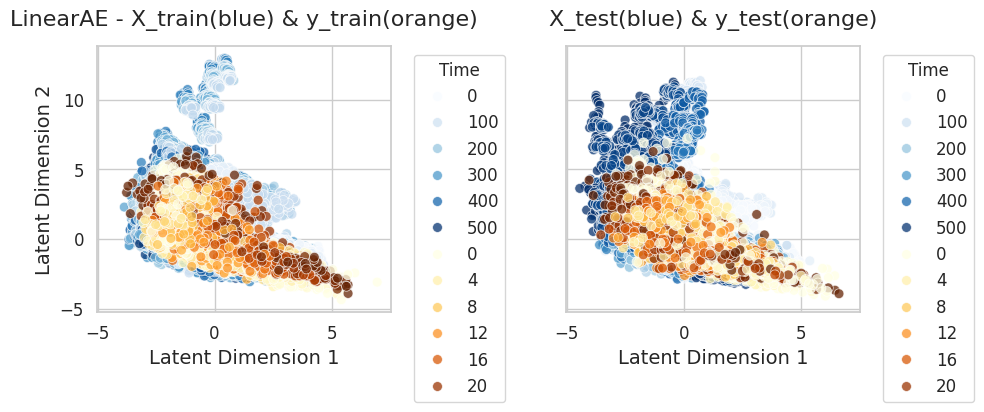

In [33]:
adapter_path = "/mnt/vdb/abenechehab/dicl-adapters/logs/logger/Illness_pred=24/20250127_021352_Illness_pred=24_VAE_MOMENT-1-small/n_comp_2/adapter.pt"
adapter = torch.load(adapter_path)

device = adapter.device

# Apply PCA to X
X_pca = (
    adapter.transform_torch(torch.from_numpy(X_train).float().to(device))
    .cpu()
    .detach()
    .numpy()
)
adapter.context_length = 24
y_pca = (
    adapter.transform_torch(torch.from_numpy(y_train).float().to(device))
    .cpu()
    .detach()
    .numpy()
)
adapter.context_length = 512
X_test_pca = (
    adapter.transform_torch(torch.from_numpy(X_test).float().to(device))
    .cpu()
    .detach()
    .numpy()
)
adapter.context_length = 24
y_test_pca = (
    adapter.transform_torch(torch.from_numpy(y_test).float().to(device))
    .cpu()
    .detach()
    .numpy()
)

# Prepare data for plotting
max_time = X_train.shape[0] + y_train.shape[0]
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca_df["batch_idx"] = X_pca_df.index // 512
X_pca_df["time"] = X_pca_df.index % 512


y_pca_df = pd.DataFrame(y_pca, columns=["PC1", "PC2"])
y_pca_df["batch_idx"] = y_pca_df.index // 24
y_pca_df["time"] = y_pca_df.index % 24

X_test_pca_df = pd.DataFrame(X_test_pca, columns=["PC1", "PC2"])
X_test_pca_df["batch_idx"] = X_test_pca_df.index // 512
X_test_pca_df["time"] = X_test_pca_df.index % 512

y_test_pca_df = pd.DataFrame(y_test_pca, columns=["PC1", "PC2"])
y_test_pca_df["batch_idx"] = y_test_pca_df.index // 24
y_test_pca_df["time"] = y_test_pca_df.index % 24

# Set style parameters for scientific paper
plt.rcParams.update(
    {
        "font.size": 14,
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 12,
    }
)

# Plot the first two principal components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# Plot X
sns.scatterplot(
    data=X_pca_df,
    x="PC1",
    y="PC2",
    hue="time",
    palette="Blues",
    alpha=0.75,
    s=50,
    ax=ax1,
)
sns.scatterplot(
    data=y_pca_df,
    x="PC1",
    y="PC2",
    hue="time",
    palette="YlOrBr",
    alpha=0.75,
    s=50,
    ax=ax1,
)
ax1.set_title(
    "LinearAE - X_train(blue) & y_train(orange)",
    pad=15,
)
ax1.set_xlabel("Latent Dimension 1", fontsize=14)
ax1.set_ylabel("Latent Dimension 2", fontsize=14)
ax1.legend(title="Time", title_fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

# Create custom norm with specific boundaries
norm = plt.Normalize(vmin=0, vmax=X_train.shape[0])
norm_y = plt.Normalize(vmin=X_train.shape[0], vmax=X_train.shape[0] + y_train.shape[0])

# Plot X @ W_star
sns.scatterplot(
    data=X_test_pca_df,
    x="PC1",
    y="PC2",
    hue="time",
    # size="batch_idx",
    palette="Blues",
    alpha=0.75,
    s=50,
    ax=ax2,
)
sns.scatterplot(
    data=y_test_pca_df,
    x="PC1",
    y="PC2",
    hue="time",
    palette="YlOrBr",
    alpha=0.75,
    s=50,
    ax=ax2,
)
ax2.set_title("X_test(blue) & y_test(orange)", pad=15)
ax2.set_xlabel("Latent Dimension 1", fontsize=14)
ax2.set_ylabel("Latent Dimension 2", fontsize=14)
ax2.legend(title="Time", title_fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout
plt.tight_layout(w_pad=3)

# Save with high DPI
plt.savefig(
    "/mnt/vdb/abenechehab/dicl-adapters/figures/from_notebooks/linear_latent_illness.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.savefig(
    "/mnt/vdb/abenechehab/dicl-adapters/figures/from_notebooks/linear_latent_illness.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

# Calibration plots

In [23]:
from dicl.utils.calibration import ks_cdf

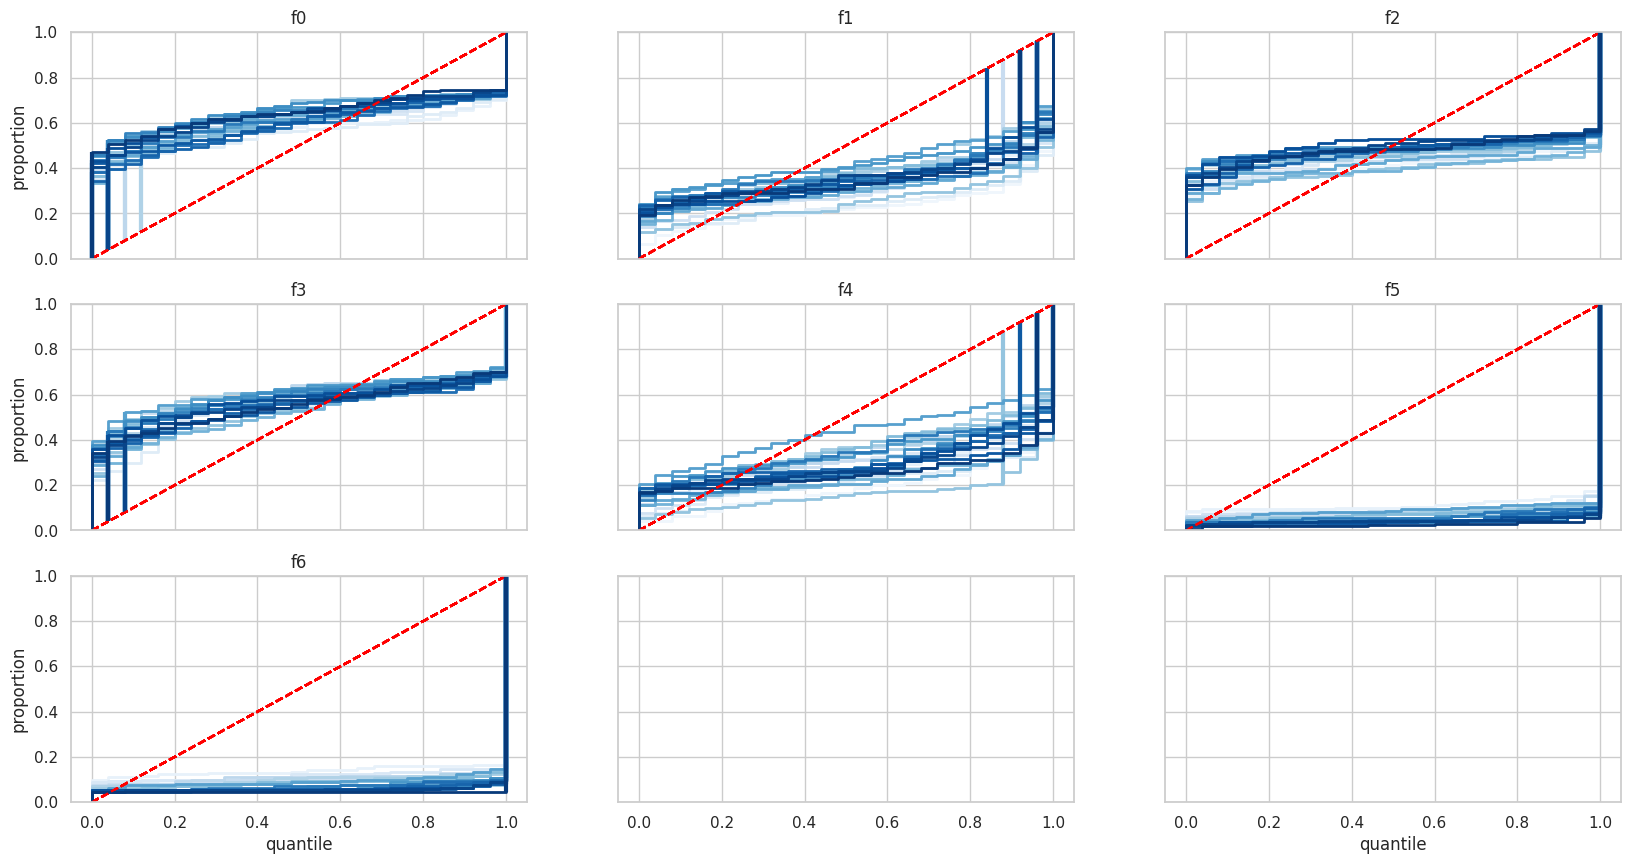

In [39]:
n_features = 7

# path = "/mnt/vdb/abenechehab/dicl-adapters/logs/logger/Illness_pred=24/20250127_200503_Illness_pred=24_linearVAE_MOMENT-1-small/n_comp_7"
path = "/mnt/vdb/abenechehab/dicl-adapters/logs/latest/Illness_pred=24/20250128_003638_Illness_pred=24_linearVAE_MOMENT-1-small/n_comp_7"
all_kss, all_ks_quantiles = (
    np.load(f"{path}/ks.npy"),
    np.load(f"{path}/ks_quantiles.npy"),
)

feature_names = [f"f{i}" for i in range(n_features)]

_, axes = plt.subplots(
    (n_features // 3) + 1,
    3,
    figsize=(20, 10),
    gridspec_kw={"wspace": 0.2, "hspace": 0.2},
    sharex=True,
    sharey=True,
)
axes = list(np.array(axes).flatten())
for h in range(24):
    kss, ks_quantiles = all_kss[:, h], all_ks_quantiles[:, h]
    for dim in range(n_features):
        ks_cdf(
            ks_quantiles,
            dim,
            ax=axes[dim],
            verbose=0,
            pot_cdf_uniform=True,
            color=sns.color_palette("Blues", n_colors=24)[h],
            label=f"{h}",
        )
        axes[dim].set_title(f"{feature_names[dim]}")
        axes[dim].grid(True)
        if dim >= 3 * (n_features // 3):
            axes[dim].set_xlabel("quantile")
            if dim % 3 == 1:
                axes[dim].legend(
                    title="prediction horizon",
                    loc="upper center",
                    bbox_to_anchor=(0.5, -0.38),
                    ncol=6,
                    fontsize=9,
                )
        # else:
        #     axes[dim].legend(
        #         loc="upper center", bbox_to_anchor=(0.5, -0.18), ncol=6, fontsize=9
        #     )
        if dim % 3 == 0:
            axes[dim].set_ylabel("proportion")
axes[-1].set_xlabel("quantile")
plt.show()